<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#02262b;overflow:hidden;font-weight:500"><b>edX </b><br>EDA, Insights,Analysis</div>

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ydata_profiling import ProfileReport
%matplotlib inline        

# 🧾Lectura de Datos

In [1]:
df = pd.read_csv("edx_courses.csv")
df.head()

NameError: name 'pd' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Nos damos cuenta que el dataset carece de informacion acerca de la valoracion de los cursos, y al buscar en la pagina de "edx", tampoco se encuentra alguna valoracion para cada curso, es por eso que no es posible segmentar el analisis para el <b>rating<b>

In [6]:
# Analizamos el dataframe y escogemos las columnas que nos interesan para el analisis

columnas = ["title","n_enrolled","Level","subject","language","price"]
df= df[columnas]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       975 non-null    object
 1   n_enrolled  855 non-null    object
 2   Level       975 non-null    object
 3   subject     975 non-null    object
 4   language    975 non-null    object
 5   price       975 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [8]:
df = df.dropna(subset="n_enrolled")

In [9]:
# Quita las comas de la columna 'Numeros'
df['n_enrolled'] = df['n_enrolled'].str.replace(',', '')

In [10]:
df['n_enrolled'] = df['n_enrolled'].astype(int)


In [11]:
df['Level'] = df['Level'].astype('category')
df = df.rename(columns={'Level': 'level'})

In [12]:
# Utiliza str.extract con una expresión regular para extraer el número
df['price'] = df['price'].str.extract('(\d+)').astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 973
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       855 non-null    object  
 1   n_enrolled  855 non-null    int32   
 2   level       855 non-null    category
 3   subject     855 non-null    object  
 4   language    855 non-null    object  
 5   price       855 non-null    int32   
dtypes: category(1), int32(2), object(3)
memory usage: 34.4+ KB


In [14]:
df.describe()

,n_enrolled,price
count,8.550000e+02,855.000000
mean,5.326035e+04,101.639766
std,1.190309e+05,70.599134
min,5.001000e+03,5.000000
25%,1.176450e+04,49.000000
50%,2.413000e+04,79.000000
75%,5.479600e+04,149.000000
max,2.442271e+06,450.000000


In [15]:
df.head()

,title,n_enrolled,level,subject,language,price
0,How to Learn Online,124980,Introductory,Education & Teacher Training,English,49
1,Programming for Everybody (Getting Started wit...,293864,Introductory,Computer Science,English,49
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,90
3,The Analytics Edge,129555,Intermediate,Data Analysis & Statistics,English,199
4,Marketing Analytics: Marketing Measurement Str...,81140,Introductory,Computer Science,English,249


In [16]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pregunta a resolver:

¿Qué tanto influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido?

# 📉 Exploracion de Datos

<Axes: >

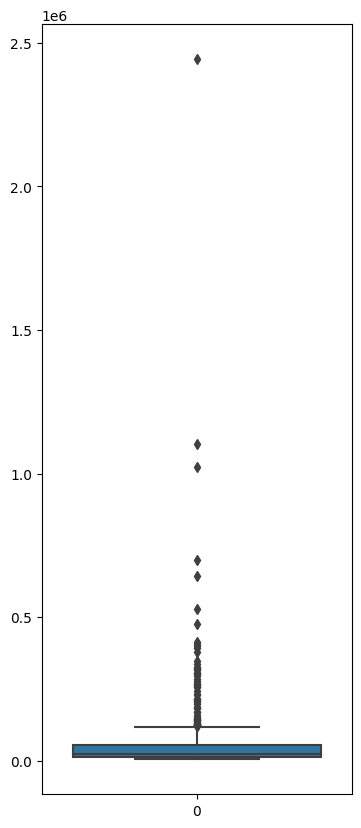

In [18]:
plt.figure(figsize=(4,10))
sns.boxplot(data=df.n_enrolled)

<Axes: >

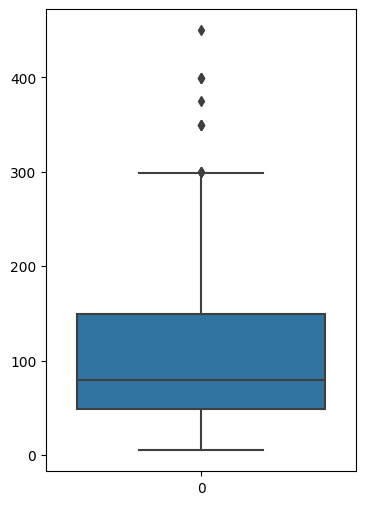

In [21]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df.price)

HISTOGRAMA

Text(0, 0.5, 'Frecuencia')

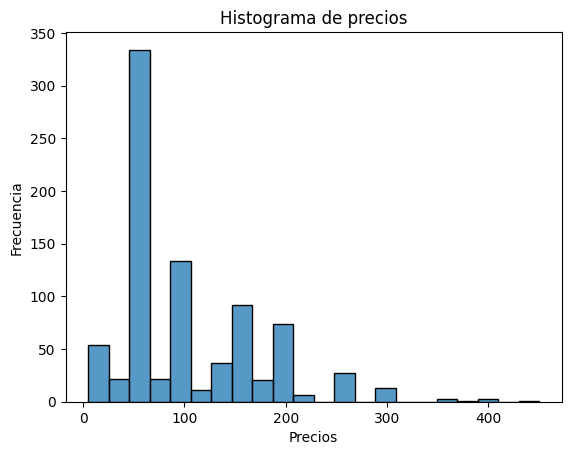

In [33]:
sns.histplot(data=df, x='price')

# Personalizamos el título y los ejes 
plt.title('Histograma de precios')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'DISTRIBUCION DE IDIOMAS')

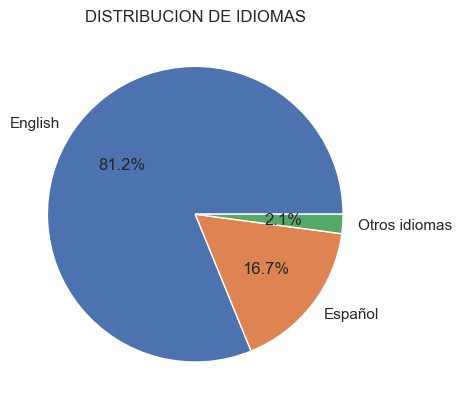

In [123]:
# Obtenemos los dos idiomas con más conteos
top_languages = df['language'].value_counts().nlargest(2).index

# Creamos una nueva columna en el DataFrame que agrupe los idiomas
df['language_grouped'] = df['language'].apply(lambda x: x if x in top_languages else 'Otros idiomas')

# Contamos los conteos de los idiomas agrupados
language_counts = df['language_grouped'].value_counts()

# Creamos un gráfico de pastel con los idiomas agrupados
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title('DISTRIBUCION DE IDIOMAS')

COUNTPLOT

<Axes: xlabel='level', ylabel='count'>

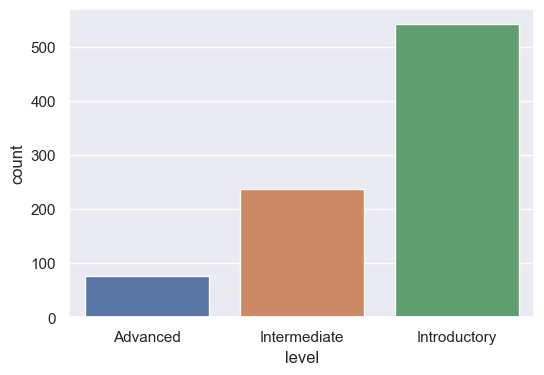

In [108]:
fig_dims = (6,4)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='level',data = df,ax=ax)

GRAFICO DE TORTA

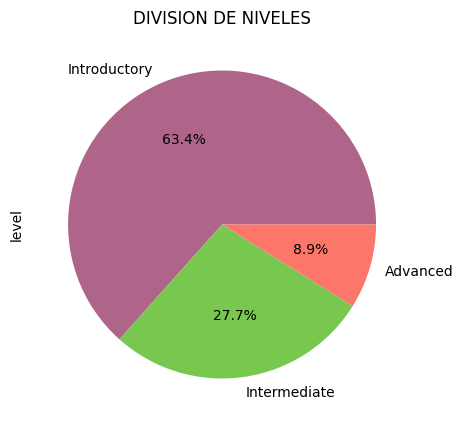

In [56]:
colors =  ["#AF6589FF", "#78C850","#FC766AFF"]
ax= df['level'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(8, 5))
plt.title('DIVISION DE NIVELES') 
plt.show()

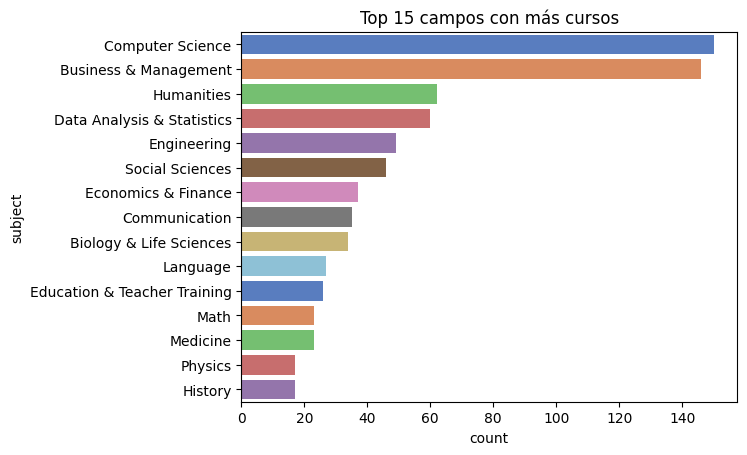

In [64]:
sns.countplot(y='subject', data=df,
              order=df["subject"].value_counts().index[:15],
              palette='muted')
plt.title('Top 15 campos con más cursos')
plt.show()

<Figure size 1000x600 with 0 Axes>

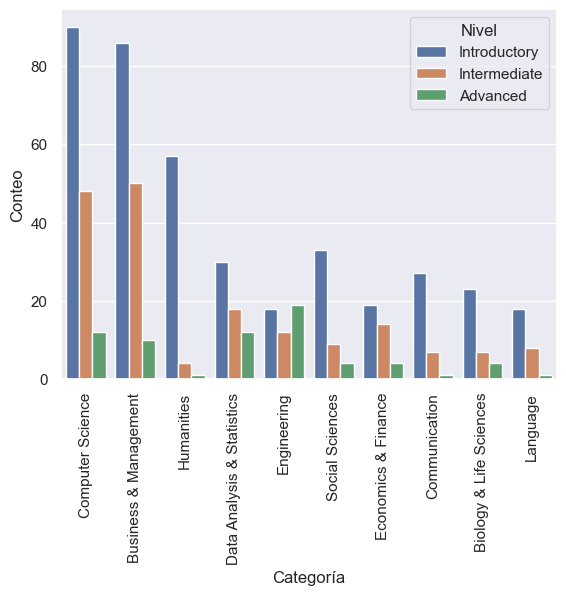

<Figure size 1000x600 with 0 Axes>

In [101]:
# Creamos el gráfico de barras apiladas
sns.countplot(x='subject', hue='level', data=df,
              order=df["subject"].value_counts().index[:10],
              hue_order=['Introductory', 'Intermediate', 'Advanced'])

# Configuraramos etiquetas y leyenda
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.legend(title='Nivel')

# Ajustamos las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustamos el tamaño de la figura
plt.figure(figsize=(10, 6))

Para responder a la pregunta sobre cómo influyen el precio, idioma, nivel y rating de cada curso en la demanda del producto vendido, podemos ayudarnos visualizando los siguientes graficos.

# 🔍 Más EDA

POR CATEGORIA

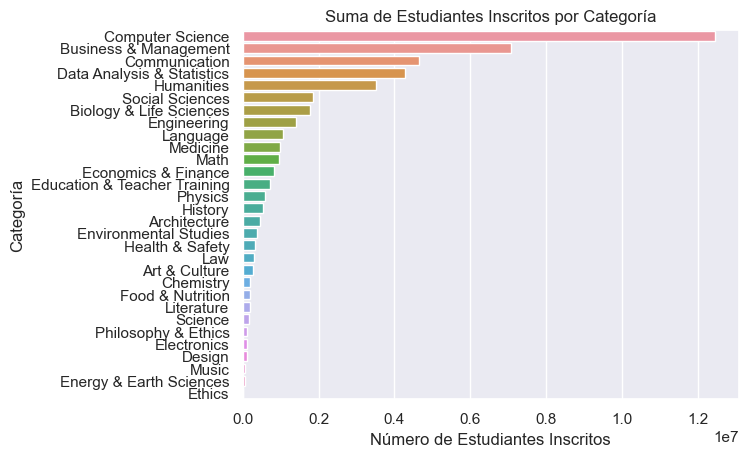

In [100]:
sns.set(style='darkgrid')

# Calculamos la suma de n_enrolled por categoría
suma_inscritos_por_categoria = df.groupby('subject')['n_enrolled'].sum().reset_index()

# Creamos el gráfico de barras
sns.barplot(x='n_enrolled', y='subject', data=suma_inscritos_por_categoria, order=suma_inscritos_por_categoria.sort_values('n_enrolled', ascending=False)['subject'])

# Agregamos etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Categoría')
plt.title('Suma de Estudiantes Inscritos por Categoría')

# Muestra el gráfico
plt.show()

POR NIVEL

Text(0.5, 1.0, 'Suma de Estudiantes Inscritos por Nivel')

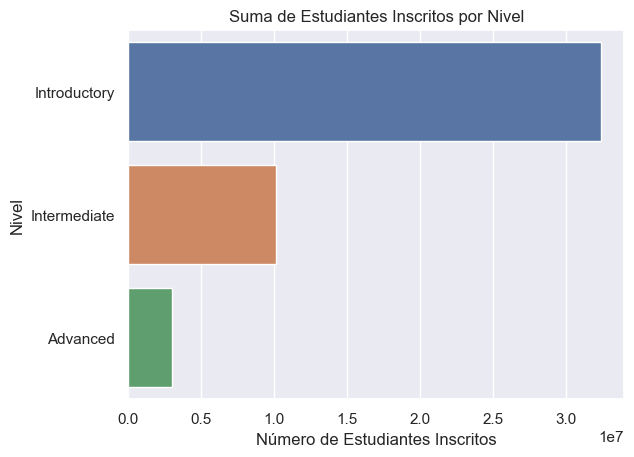

In [19]:
sns.set(style='darkgrid')

# Calculamos la suma de n_enrolled por nivel
suma_inscritos_por_nivel = df.groupby('level')['n_enrolled'].sum().reset_index()

# Crea el gráfico de barras
sns.barplot(x='n_enrolled', y='level', data=suma_inscritos_por_nivel, order=suma_inscritos_por_nivel.sort_values('n_enrolled', ascending=False)['level'])

# Agrega etiquetas a los ejes
plt.xlabel('Número de Estudiantes Inscritos')
plt.ylabel('Nivel')
plt.title('Suma de Estudiantes Inscritos por Nivel')

POR PRECIOS

Text(0.5, 1.0, 'Top 15 Precios con Más Estudiantes Inscritos')

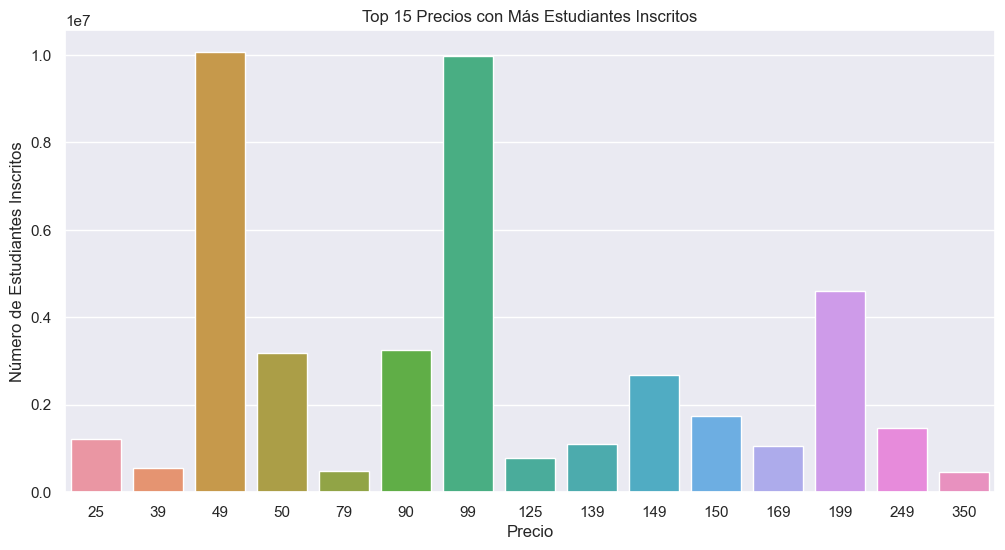

In [134]:
sns.set(style='darkgrid')

# Agrupamos por precio y sumamos el número de estudiantes inscritos
precio_n_enrolled = df.groupby('price')['n_enrolled'].sum().reset_index()

# Ordenamos por el número de estudiantes inscritos de forma descendente
precio_n_enrolled_sorted = precio_n_enrolled.sort_values('n_enrolled', ascending=False)

# Tomamos los 15 precios con más estudiantes inscritos
top_15_precios = precio_n_enrolled_sorted.head(15)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='n_enrolled', data=top_15_precios)

# Agregamos etiquetas a los ejes
plt.xlabel('Precio')
plt.ylabel('Número de Estudiantes Inscritos')
plt.title('Top 15 Precios con Más Estudiantes Inscritos') 

POR IDIOMAS

Text(0.5, 1.0, 'Distribución del Número de Estudiantes Inscritos por Idioma')

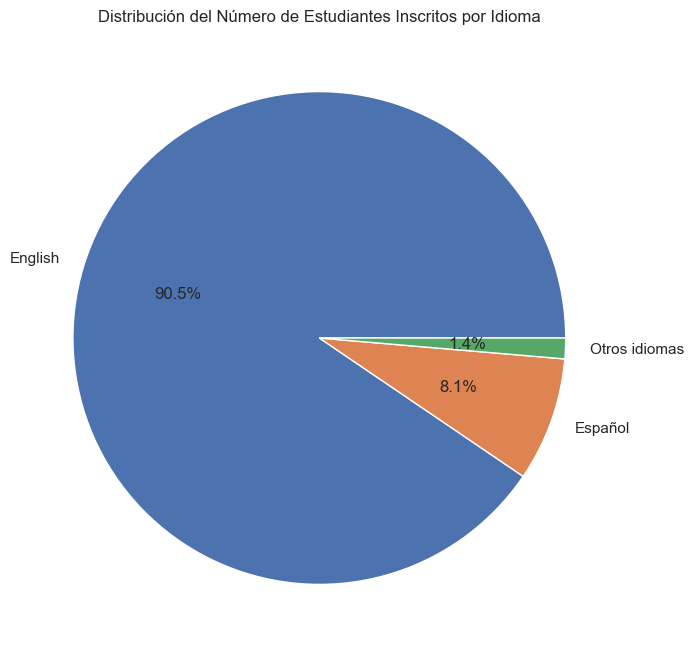

In [131]:
# Agrupamos por idioma y suma el número de estudiantes inscritos
idioma_n_enrolled = df.groupby('language')['n_enrolled'].sum().reset_index()

# Ordenamos por el número de estudiantes inscritos de forma descendente
idioma_n_enrolled_sorted = idioma_n_enrolled.sort_values('n_enrolled', ascending=False)

# Obtenemos los dos idiomas con más números de estudiantes inscritos
top_languages = idioma_n_enrolled_sorted['language'].head(2).tolist()

# Agrupamos los idiomas restantes en 'Otros idiomas' y suma el número de estudiantes inscritos
idioma_n_enrolled_sorted.loc[~idioma_n_enrolled_sorted['language'].isin(top_languages), 'language'] = 'Otros idiomas'
idioma_n_enrolled_grouped = idioma_n_enrolled_sorted.groupby('language')['n_enrolled'].sum()

# Creamos un gráfico de torta con los porcentajes de estudiantes inscritos por idioma
plt.figure(figsize=(8, 8))
plt.pie(idioma_n_enrolled_grouped, labels=idioma_n_enrolled_grouped.index, autopct='%1.1f%%')

# Agregamos un título al gráfico
plt.title('Distribución del Número de Estudiantes Inscritos por Idioma')

# ☁️✨
<b>CREAMOS UN WORDCLOUD CON LAS PALABRAS MAS COMUNES EN LOS TITULOS DE LOS CURSOS<b>

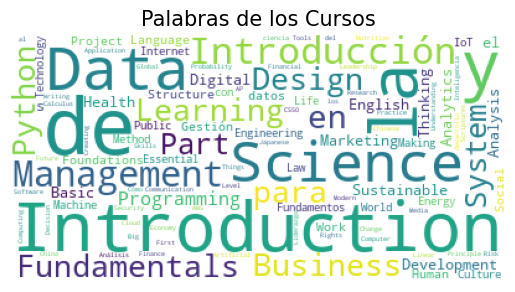

In [4]:
text = df["title"].values
wordcloud_for_travel=WordCloud(background_color='white',collocations=False).generate(" ".join(text))
plt.axis('off')
plt.title("Palabras de los Cursos",fontsize=15)
plt.imshow(wordcloud_for_travel)